In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

In [3]:
#creating dataset 
X_pl=[]
X_nl=[]
y_pl=[]
y_nl=[]
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
for j,i in enumerate(ratios):
    #plt.subplot(4, 4, j+1)
    #print(i,j)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X_pl.append(X_p)
    X_nl.append(X_n)
    y_pl.append(y_p)
    y_nl.append(y_n)

### Creating 4 types of datasets where some datasets are balanced and some are imbalanced 

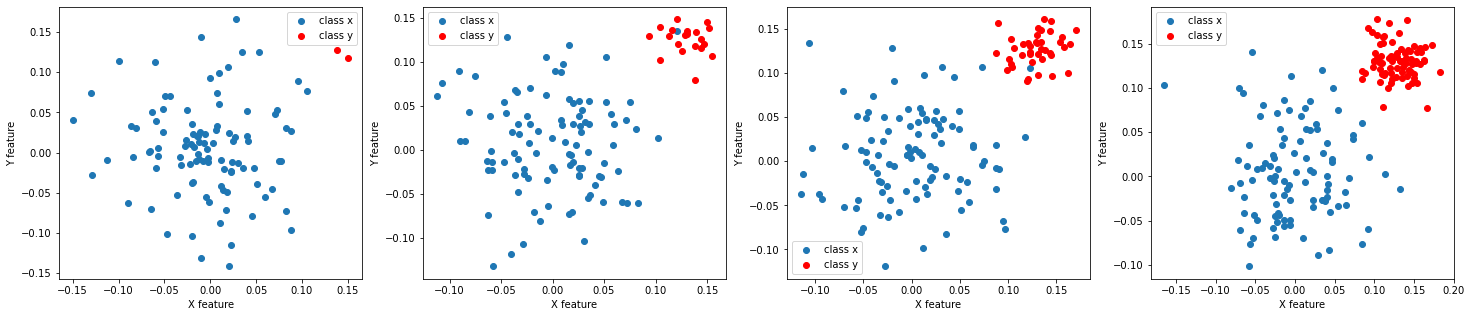

In [4]:
#creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
label=[]
data=[]
plt.figure(figsize=(25,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=X_pl[j]
    X_n=X_nl[j]
    y_p=y_pl[j]
    y_n=y_nl[j]
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    data.append(X)
    label.append(y)
    plt.scatter(X_p[:,0],X_p[:,1],label='class x')
    plt.scatter(X_n[:,0],X_n[:,1],color='red',label='class y')
    plt.xlabel('X feature')
    plt.ylabel('Y feature')
    plt.legend()
plt.show()

### Checking how imbalanced dataset effects Support Vector Classifier (SVC)

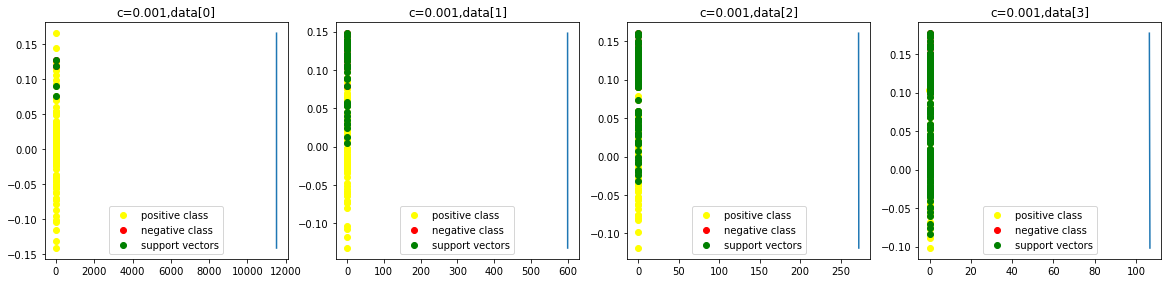

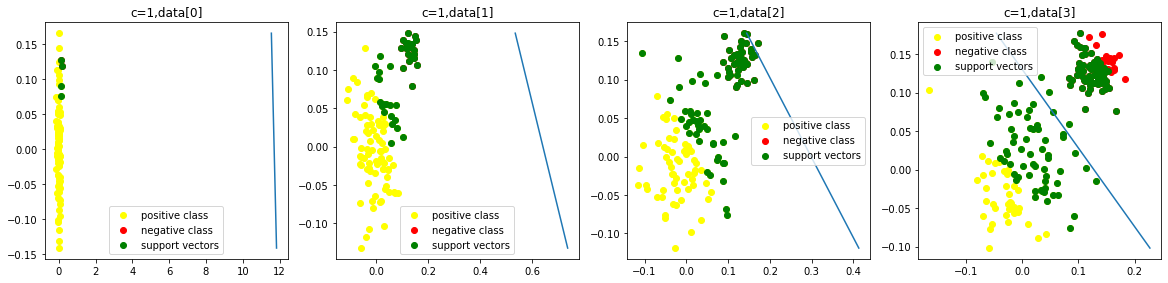

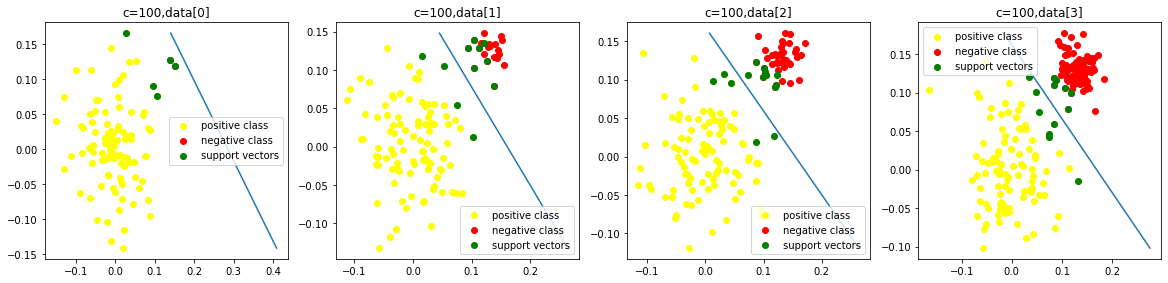

In [6]:
#SVC
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
label=[]
data=[]
c=[0.001,1,100]
for b in range(3): 
  c1=c[b]
  plt.figure(figsize=(20,20))
  for j,i in enumerate(ratios):
      plt.subplot(4, 4, j+1)
      X_p=X_pl[j]
      X_n=X_nl[j]
      y_p=y_pl[j]
      y_n=y_nl[j]
      X=np.vstack((X_p,X_n))
      y=np.vstack((y_p,y_n))
      data.append(X)
      label.append(y)
      model=SVC(kernel='linear',C=c1)
      model.fit(X,y)
      draw_line(model.coef_[0],model.intercept_,min(X[:, 1]),max(X[:, 1]))
      plt.scatter(X_p[:,0],X_p[:,1],color='yellow',label='positive class ')
      plt.scatter(X_n[:,0],X_n[:,1],color='red',label='negative class ')
      plt.scatter(model.support_vectors_.T[0],model.support_vectors_.T[1],color='green',label='support vectors')
      plt.legend()
      plt.title(f'c={c1},data[{j}]')
  plt.show()

### Checking how imbalanced Dataset effects Logistic regression

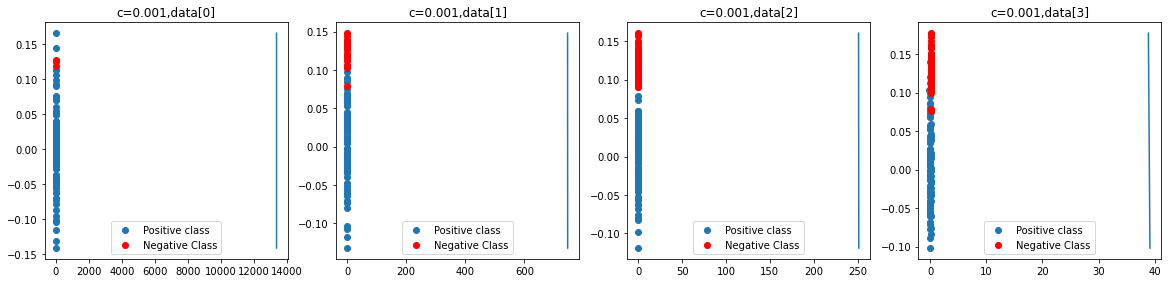

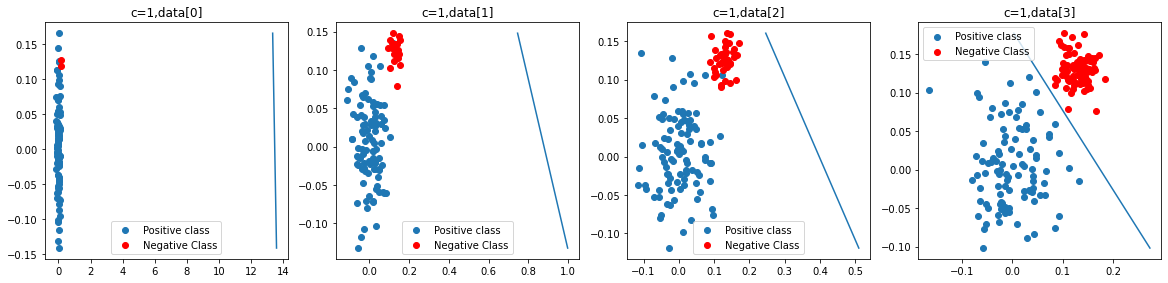

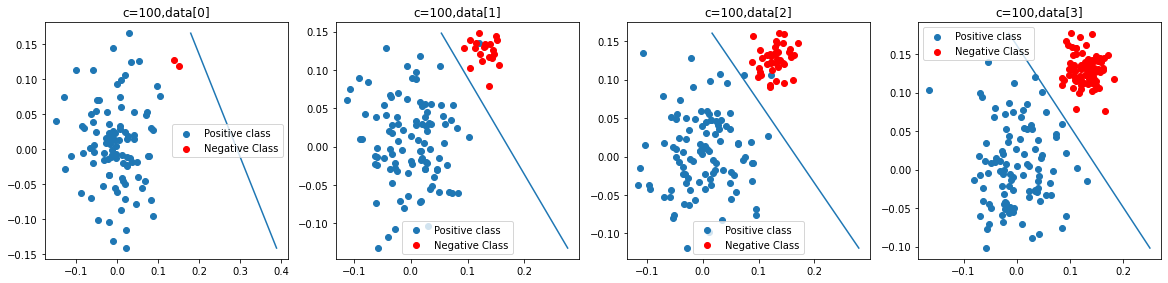

In [8]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
label=[]
data=[]
c=[0.001,1,100]
for b in range(3): 
  c1=c[b]
  plt.figure(figsize=(20,20))
  for j,i in enumerate(ratios):
      plt.subplot(4, 4, j+1)
      X_p=X_pl[j]
      X_n=X_nl[j]
      y_p=y_pl[j]
      y_n=y_nl[j]
      X=np.vstack((X_p,X_n))
      y=np.vstack((y_p,y_n))
      data.append(X)
      label.append(y)
      model = LogisticRegression(C=c1).fit(X,y)
      draw_line(model.coef_[0],model.intercept_,min(X[:, 1]),max(X[:, 1]))
      plt.scatter(X_p[:,0],X_p[:,1],label='Positive class')
      plt.scatter(X_n[:,0],X_n[:,1],color='red',label='Negative Class')
      plt.legend()
      plt.title(f'c={c1},data[{j}]')
  plt.show()

**observation**

1. if c increases then overfit increases for both logistic regression and support vector machine .
2.if c decreases then underfit increases for both logistic regression and support vector machine.
3.if c decreases means weightage to regularization equation increases so underfit increases
4. if c increases means weightage to regularization equation decreases so loss function fits more on given data    
5. if we have imbalanced data where one class dominates other class then the logistic regression or svm won't fit correctly , then we may need to increase c(regularization) to allow model to overfit so that it can classify correctly or we have to upsample the class which has lower number of data points .
6. when we have imbalanced data then we either need to upsample the data to balance it or we have to increase c value to allow model to fit correctly with the dataset 